At it's core, this is just regression.  We use a regression model over pre and post treatment periods to estimate the causal effect of an intervention which we did not run an experiment on.  This is by no means perfect. In fact, this is a very simplistic approach which should be taken with a grain of salt.  It makes no assumptions about having a control group, or even a synthetic control to compare to.  This can happen in instances where a feature is shipped globally to everyone at the same time.  We don't handle staggered adoption here either.  No additional controls outside of quantities derived from the observed time series are used, so use with at your own risk.  

Naive interupted Time Series

This is a super simple approach. All we're doing is fitting the regression model

$$Y = \beta_{0} + \beta_{1} T + \beta_{2} D + \beta_{3} P + ϵ$$,

Where:

$ Y $ is the outcome variable (In this case it's number of retail adds)

$ T $ is a continuous variable which indicates the time passed from start of the observational period

$ D $ is a dummy variable indicating observations collected before ($ D = 0 $) or after ($ D = 1 $) the intervention

$ P $ is a continuous variable indicating the time passed since the intervention has occurred (before the intervention has occurred P is equal to 0)

$ \epsilon $ represents the zero centered Gaussian random error term

We'll explore an alternative here as well which replaces the simple Ordinary Least Squares (OLS) model above with an ARIMA (AutoRegressive Integrated Moving Average) model to capture auto-correlations in our time series.  These auto-correlations can cause some of the assumptions behind OLS to breakdown, making our model somewhat questionable.  The workflow here is essentially a simplified form of the standard causal inference proceedure: 

1. Identify (i.e. determine if there are causal paths in your data generate process)

2. Estimate (i.e. use some model/calculation to estimate the effect of the above)

3. Refute (i.e. challenge the estimate and tell me why my model is wrong)

In [21]:
import sys
import pandas as pd

In [6]:
# For now, this is a simple way to import the tools we need.
# Be sure to update the path to point to where the relevant code is stored on your machine
# TBD on eventually making this importable
sys.path.append('../../../quasi_experiment_utils/')

In [7]:
import interrupted_time_series_utils

In [15]:
# Load data
df = pd.read_csv('../../../../data/mock_data_for_interrupted_ts.csv')

In [16]:
df.head()

,date,outcome
0,2022-06-01,510.100000
1,2022-06-02,511.997941
2,2022-06-03,514.311192
3,2022-06-04,514.618355
4,2022-06-05,516.682444


The mock data here represents a time series of some outcome variable.  This could be a business critical metric, or the result of an purposeful intervention without a well defined control group. (FIX THIS DESCRIPTION)

ADD MORE DESCRIPTION OF THE DATA

In [17]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

In [20]:
df.head()

,date,outcome
0,2022-06-01,510.100000
1,2022-06-02,511.997941
2,2022-06-03,514.311192
3,2022-06-04,514.618355
4,2022-06-05,516.682444


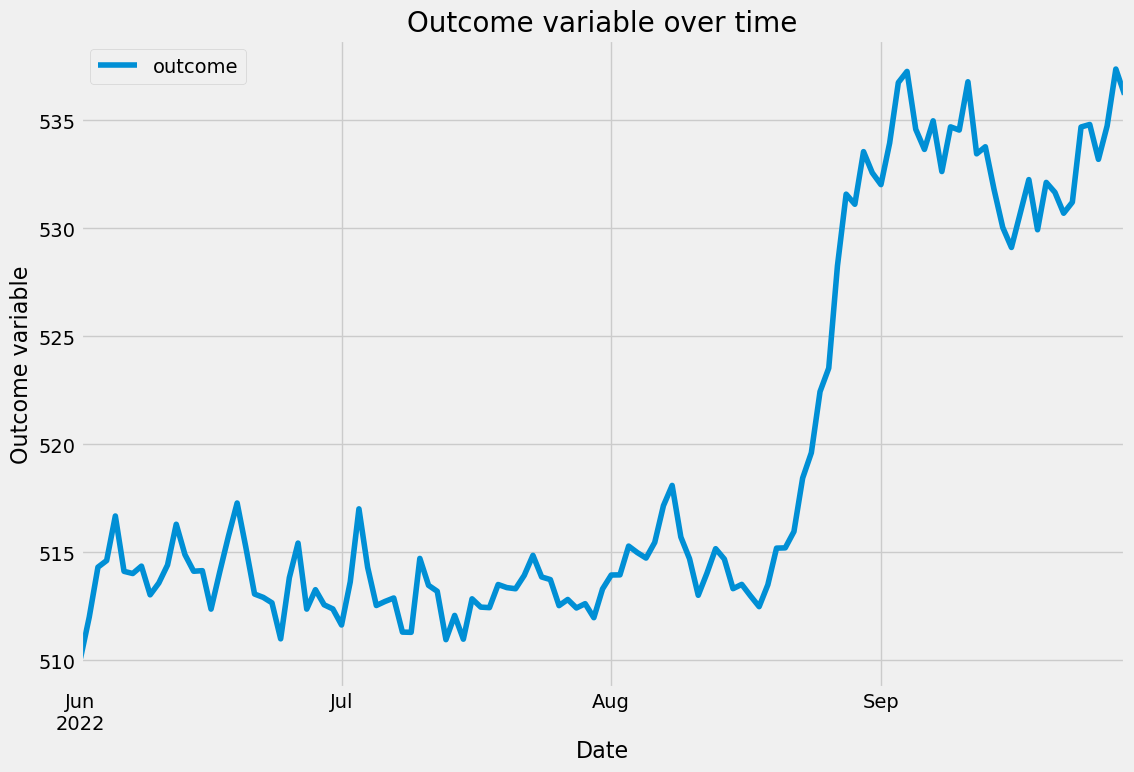

In [25]:
# Let's take a look at the data before doing anything
ax = df.set_index('date').plot(figsize=(12, 8))
ax.set_title('Outcome variable over time', fontsize=20)
ax.set_ylabel('Outcome variable', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
xtl=[item.get_text()[:10] for item in ax.get_xticklabels()]
_=ax.set_xticklabels(xtl)

In [32]:
# Let's try and estimate the effect here (which we can clearly see). We'll start with a simple Interrupted Time Series model
# First we need to specify the date on which the intervention occured. For us, it's August 25th, 2022
treatment_date = datetime.datetime(2022, 8, 25)
interrupted_ts = interrupted_time_series_utils.InterruptedTimeSeries(treatment_date=treatment_date)

                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     613.3
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           2.29e-71
Time:                        23:31:13   Log-Likelihood:                -265.12
No. Observations:                 121   AIC:                             538.2
Df Residuals:                     117   BIC:                             549.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    513.1943      0.482   1065.327      0.0

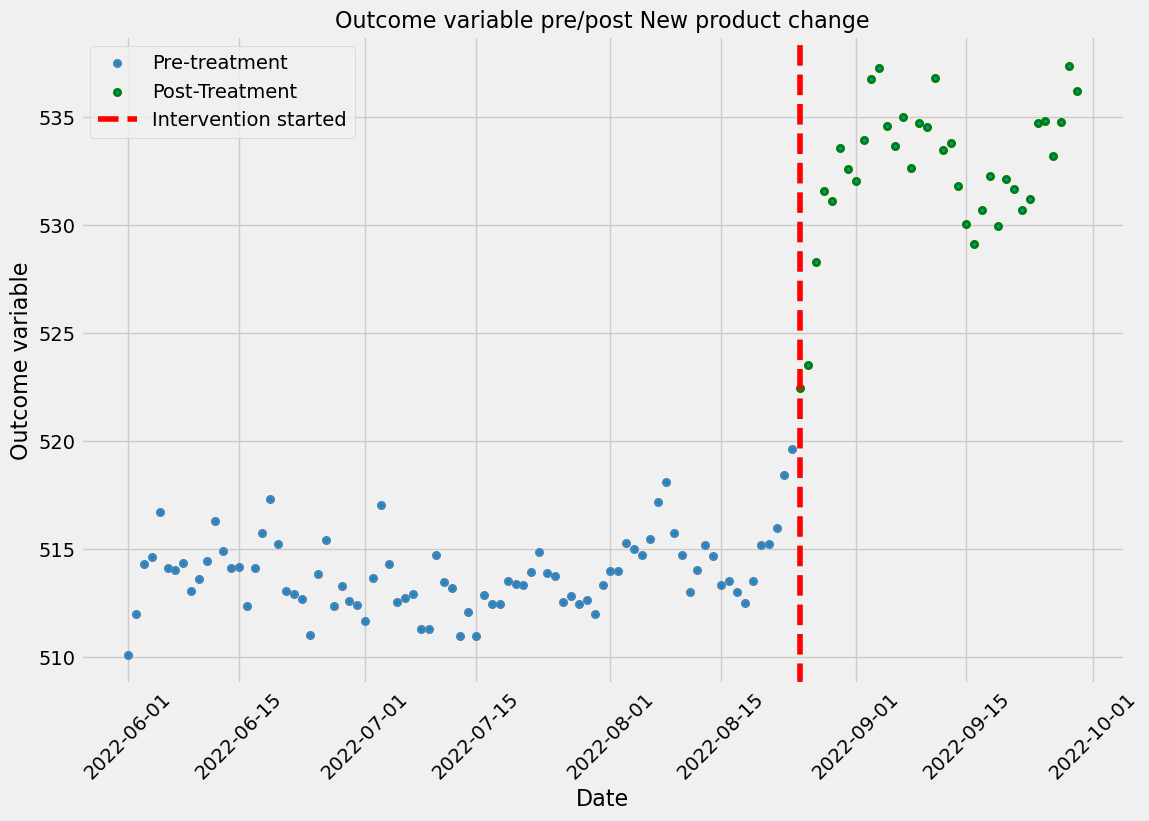

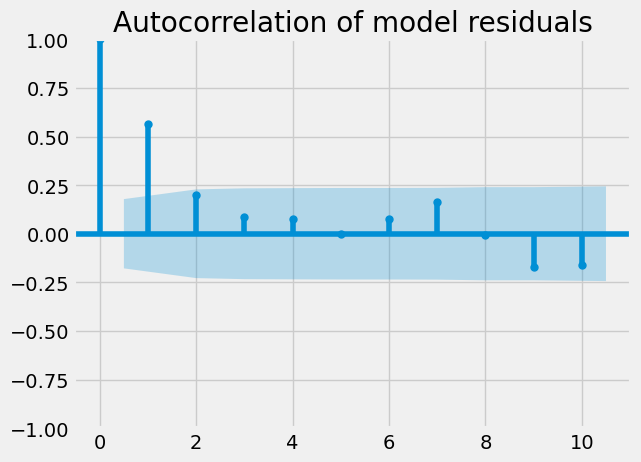

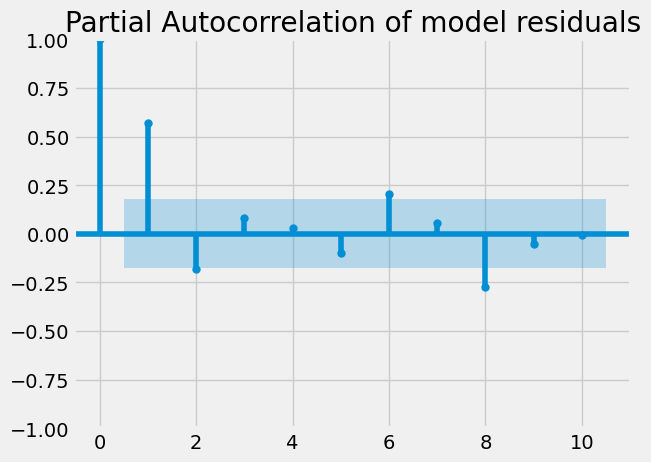

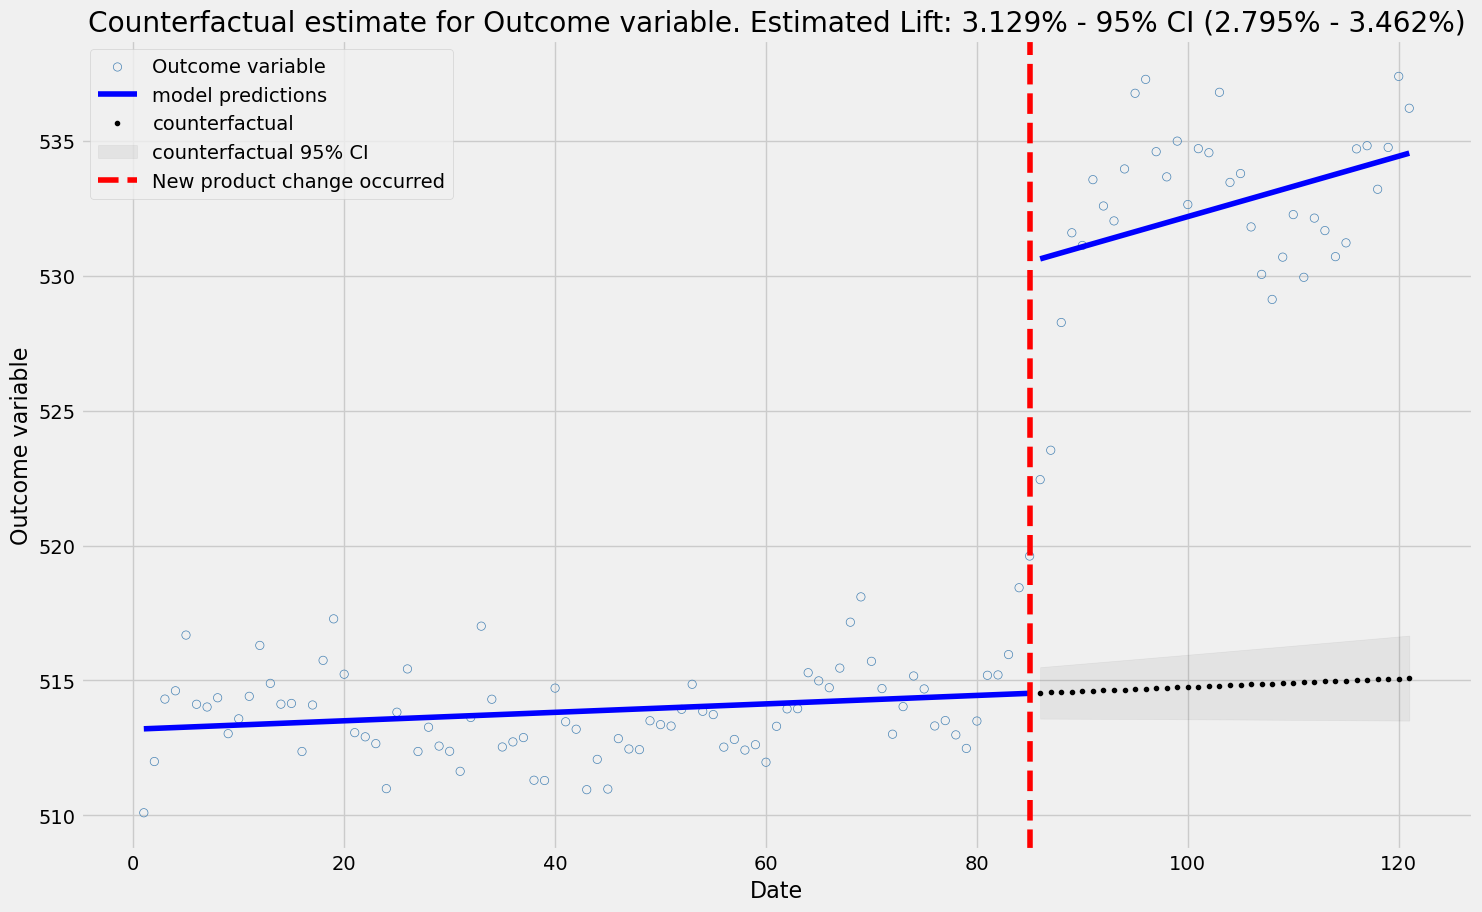

In [33]:
interrupted_ts.interrupted_time_series(df=df, 
                                       model_type='interrupted_time_series', 
                                       date_col='date', 
                                       outcome_name='Outcome variable', 
                                       outcome_col='outcome', 
                                       treatment_name='New product change')